In [67]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [167]:
#Battery
Engine_Dim = 30
Battery_Dim = 30

# Hilbert space is oscillator x battery_l x battery_k
a = tensor(destroy(Engine_Dim),  identity(Battery_Dim),          identity(Battery_Dim)          )
L = tensor(identity(Engine_Dim), Qobj(np.eye(Battery_Dim,k=+1)), identity(Battery_Dim)          )
K = tensor(identity(Engine_Dim), Qobj(np.eye(Battery_Dim,k=-1)),          Qobj(np.eye(Battery_Dim,k=+1)) )


N = a.dag()*a
NL = tensor(identity(Engine_Dim), num(Battery_Dim),      identity(Battery_Dim) )
NK = tensor(identity(Engine_Dim), identity(Battery_Dim), num(Battery_Dim)      )

In [168]:
#Engine + Battery

#Engine Operators
#A = tensor(a,qeye(Battery_Dim**2))
#C = tensor(c,qeye(Battery_Dim**2))

#Battery Operators
#LU = tensor(qeye(2)qeye(2*Engine_Dim),Lup)
#LD = tensor(qeye(2*Engine_Dim),Ldown)
#KU = tensor(qeye(2*Engine_Dim),Kup)
#KD = tensor(qeye(2*Engine_Dim),Kdown)
#NL = tensor(qeye(2*Engine_Dim),NumL)
#NK = tensor(qeye(2*Engine_Dim),NumK)

In [169]:
#Hamiltonian of Engine
omega = 1.0
H_e = omega*a.dag()*a

#Hamiltonian of battery
omega_m = 1.0
H_b = omega_m*(NL+NK)

#Interaction Hamiltonian
Coupling = 1.0
H_c = Coupling*(L.dag()*a + a.dag()*L)

# Total Hamiltonian
H = H_e + H_b + H_c

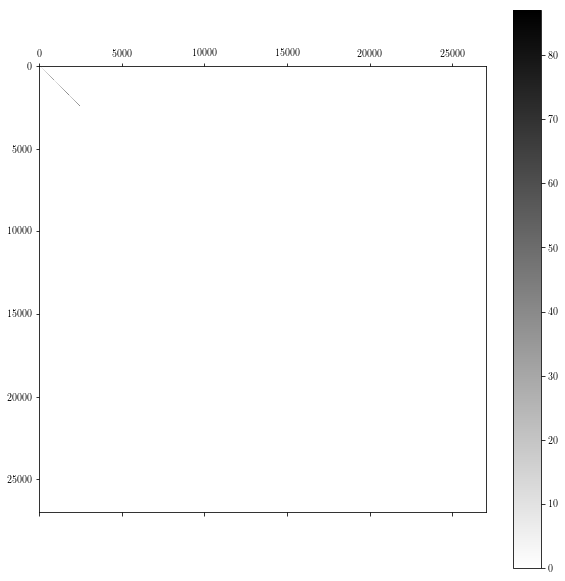

In [170]:
plt.figure(1,figsize=[10,10])
plt.matshow(np.real(H.data.toarray()),fignum=1, cmap=plt.cm.gray_r)
plt.colorbar()
#np.real(H.data.toarray())

In [175]:
def battery(j,k,Dim=1000):
    l=j-k
    state = tensor( basis(Dim,l), basis(Dim,k) )
    return state

def ket_battery(state):
    l = expect(NumL,state)
    k = expect(NumK,state)
    return l+k,k

In [176]:
oscillator_init = tensor( displace(Engine_Dim,0)*basis(Engine_Dim,10))
battery_init = battery(0,0,Dim=Battery_Dim)
psi0 = tensor(oscillator_init,battery_init)

times = np.linspace(0.0,10.0,1000)

gamma = 1.5
C0 = np.sqrt(gamma)*K.dag()
opts = Options(ntraj=1)
result = mcsolve(H, psi0, times, c_ops=[C0], e_ops=[N,NL,NK],options=opts)

100.0%. Run time:   2.95s. Est. time left: 00:00:00:00
Total run time:   2.97s


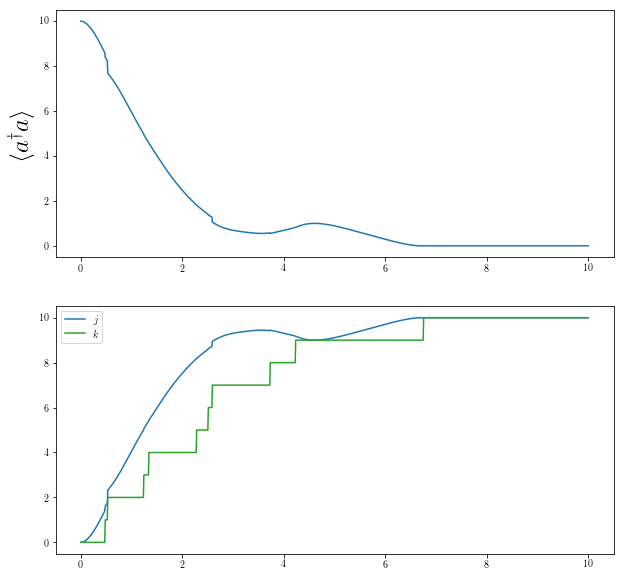

In [177]:
n = result.expect[0]
l = result.expect[1]
k = result.expect[2]
Fig, ax = plt.subplots(2,figsize=[10,10])
ax[0].plot(times,n)
ax[0].set_ylabel(r'$\langle a^\dagger a \rangle$',fontsize=25)
ax[1].plot(times,l+k,label=r'$j$')
#ax[1].set_ylabel(r'$j$',fontsize=25)
ax[1].plot(times,k,'C2',label=r'$k$')
ax[1].legend()


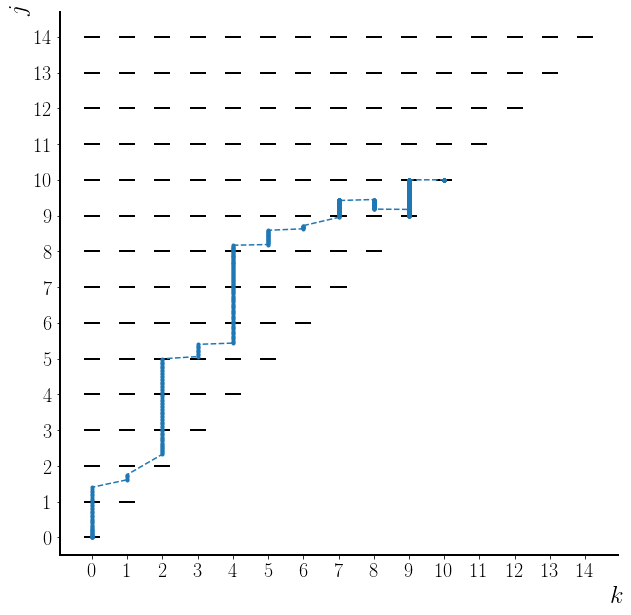

In [178]:
jmax=15
plt.figure(figsize=[10,10])
ax = plt.gca()
# Ploting the levels
for jcount in range(jmax):
    for kcount in range(jcount+1):
        ax.plot([-0.2+kcount,0.2+kcount],[jcount,jcount],'k',lw=2)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_lw(2)
ax.spines['bottom'].set_lw(2)

ymin,ymax = ax.get_ylim()
ax.set_ylim([-0.5,ymax])
ax.set_xticks(range(jmax))
ax.set_yticks(range(jmax))
ax.tick_params(labelsize=20)

ax.set_xlabel(r'$k$', fontsize=25, x=1,y=1)
ax.set_ylabel(r'$j$', fontsize=25, x=1,y=1)

ax.plot(k,l+k,'.--')

In [144]:
psi0

Quantum object: dims = [[10, 10, 10], [1, 1, 1]], shape = (1000, 1), type = ket
Qobj data =
[[-0.03466753]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.   

In [53]:
omega_m = 1
H = omega_m*(NumL+NumK)

In [57]:
expect(H,battery(4,3))

4.0

In [10]:
state2 = Lup*newstate
ket_battery(state2)

(2.0, 1.0)

In [11]:
state2.dag()*Lup*Ldown*state2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[ 1.]]

In [73]:
l.data.toarray()[0][0].real

0.0

In [129]:
import sys
print(sys.version)

3.5.2 |Anaconda 4.3.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
